In [2]:
import numpy as np
from scipy import linalg as la
import math

#Problem 1

def truncated_svd(A, k = None):
    
    m,n = np.shape(A)
    AH = np.conjugate(A.T) 
    eigs, vecs = la.eig(AH @ A)
    
    index = eigs.argsort()
    eigs[index]
    vecs[index]
    
    #Take out 0 eigenvalues
    for j in range (0, len(eigs)):
        if eigs[j] == 0:
            eigs = np.delete(eigs, j)
            vecs = np.delete(vecs, j, 1)

    #Truncated SVD
    if k != None and k < n: 
        eigs = eigs[:k]
        vecs = vecs[:,:k]

    r = len(eigs)   
        
    S = np.zeros((r, r))
    V = np.zeros((n,r))
    U = np.zeros((m,r))

    for i in range (0, len(eigs)):
        S[i,i] = math.sqrt(eigs[i])
        V[:,i] = vecs[:,i]
        U[:,i] = (1 / S[i,i]) * A @ V[:,i] 
    return U, S, V 

A = np.random.random((5,3))
U, S, V = truncated_svd(A)

np.allclose(U @ S @ V.T, A)

#Delete function 

/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


True

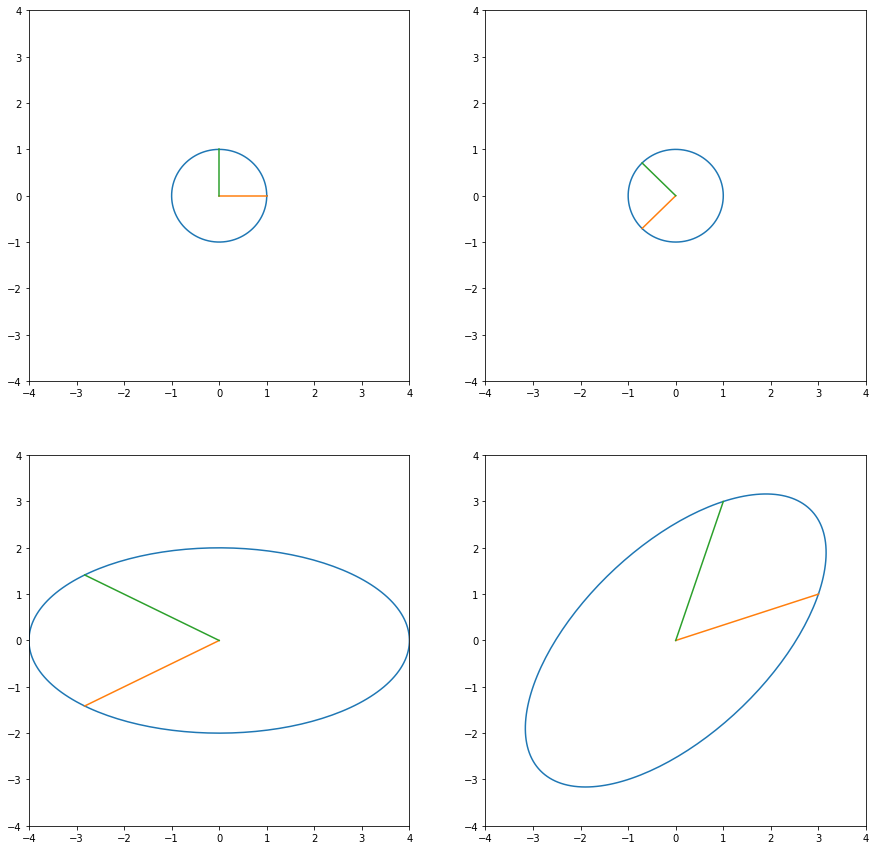

In [13]:
#Problem 2a

from matplotlib import pyplot as plt
import pylab

theta = np.linspace(0, 2*np.pi, 200)
x = np.cos(theta)
y = np.sin(theta)
points = np.vstack((x,y))

pylab.rcParams['figure.figsize'] = (15, 15)

plt.clf()
fig, axes = plt.subplots(nrows=2, ncols=2)

A = np.array([[3,1],[1,3]])
U, S, V = la.svd(A)

S = np.diag(S)

xplot = np.linspace(0,1,20)
yplot = np.zeros_like(xplot)
first = np.vstack((xplot, yplot))

yplot1 = np.linspace(0,1,20)
xplot1 = np.zeros_like(yplot1)
second = np.vstack((xplot1, yplot1))
 

#Subplot 1: Plot S
plt.subplot(221)
plt.plot(x,y)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.plot(first[0,:],first[1,:])
plt.plot(second[0,:],second[1,:])

#Subplot 2: Plot V^H * S
plt.subplot(222)
transform = V.T @ points
x = transform[0,:]
y = transform[1,:]
plt.plot(x,y)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
first = V.T @ first
second = V.T @ second
plt.plot(first[0,:],first[1,:])
plt.plot(second[0,:],second[1,:])

#Subplot 3: Plot Sigma * V^H * S
plt.subplot(223)
transform = S @ V.T @ points
x = transform[0,:]
y = transform[1,:]
plt.plot(x,y)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
first = S @ first
second = S @ second
plt.plot(first[0,:],first[1,:])
plt.plot(second[0,:],second[1,:])

#Subplot 4: Plot U * Sigma * V^H * S
plt.subplot(224)
transform = U @ S @ V.T @ points
x = transform[0,:]
y = transform[1,:]
plt.plot(x,y)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
first = U @ first
second = U @ second
plt.plot(first[0,:],first[1,:])
plt.plot(second[0,:],second[1,:])

plt.show()

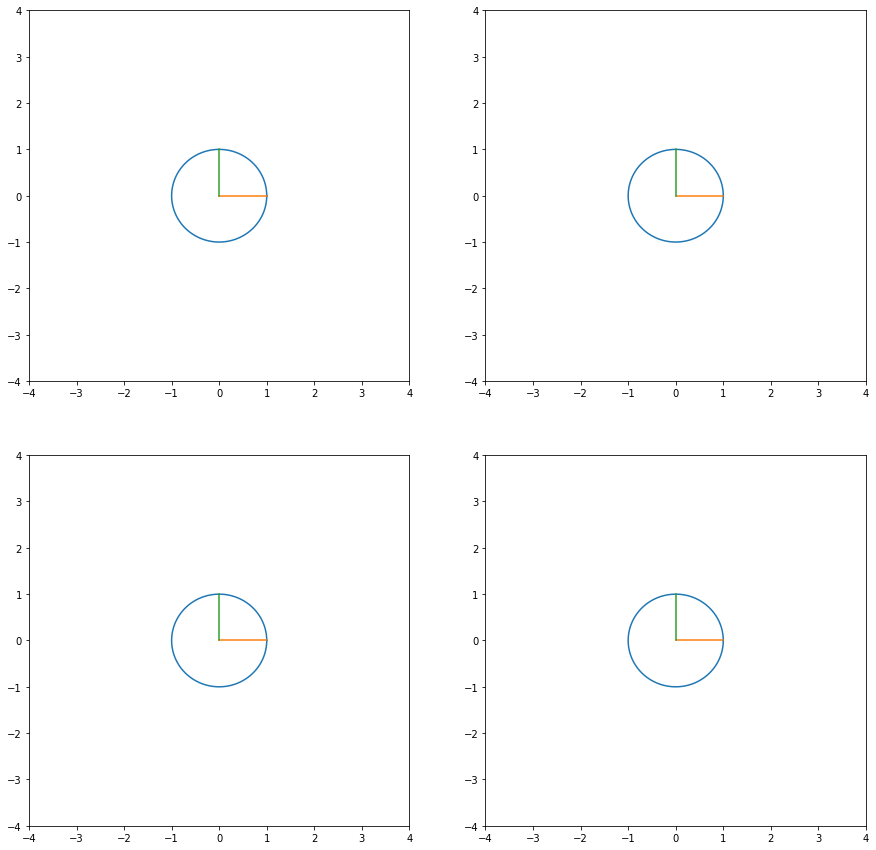

In [14]:
#Problem 2b

from matplotlib import pyplot as plt
import pylab

theta = np.linspace(0, 2*np.pi, 200)
x = np.cos(theta)
y = np.sin(theta)
points = np.vstack((x,y))

pylab.rcParams['figure.figsize'] = (15, 15)

plt.clf()
fig, axes = plt.subplots(nrows=2, ncols=2)

A = np.array([[1,0],[0,1]])
U, S, V = la.svd(A)

S = np.diag(S)

xplot = np.linspace(0,1,20)
yplot = np.zeros_like(xplot)
first = np.vstack((xplot, yplot))

yplot1 = np.linspace(0,1,20)
xplot1 = np.zeros_like(yplot1)
second = np.vstack((xplot1, yplot1))
 

#Subplot 1: Plot S
plt.subplot(221)
plt.plot(x,y)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.plot(first[0,:],first[1,:])
plt.plot(second[0,:],second[1,:])

#Subplot 2: Plot V^H * S
plt.subplot(222)
transform = V.T @ points
x = transform[0,:]
y = transform[1,:]
plt.plot(x,y)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
first = V.T @ first
second = V.T @ second
plt.plot(first[0,:],first[1,:])
plt.plot(second[0,:],second[1,:])

#Subplot 3: Plot Sigma * V^H * S
plt.subplot(223)
transform = S @ V.T @ points
x = transform[0,:]
y = transform[1,:]
plt.plot(x,y)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
first = S @ first
second = S @ second
plt.plot(first[0,:],first[1,:])
plt.plot(second[0,:],second[1,:])

#Subplot 4: Plot U * Sigma * V^H * S
plt.subplot(224)
transform = U @ S @ V.T @ points
x = transform[0,:]
y = transform[1,:]
plt.plot(x,y)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
first = U @ first
second = U @ second
plt.plot(first[0,:],first[1,:])
plt.plot(second[0,:],second[1,:])

plt.show()

In [102]:
#Problem 3 

import cmath

def svd_approx(A, k):
    
    U,S,Vh = la.svd(A, full_matrices=False)
    S = np.diag(S[:k])
    Ahat = U[:,:k].dot(S).dot(Vh[:k,:])
    
    #diff = A - Ahat
    #norm2 = la.norm(diff)
    #fnorm = cmath.sqrt(np.trace(np.conjugate(diff.T) @ diff))
    return Ahat

A = np.random.random((5,3))

Ahat = svd_approx(A,2)

print(Ahat)

[[ 0.74234883  0.47798712  0.4611249 ]
 [ 0.90810415  0.68906986  0.33558491]
 [ 0.92456971  0.5740294   0.62092616]
 [ 0.48929844  0.08776172  0.80162427]
 [ 0.92524596  0.65309768  0.44916749]]


In [104]:
#Problem 4

def lowest_rank_approx(A, e):
    
    U, S, Vh = truncated_svd(A)
    
    k = 0
    for i in range (0, len(S)):
        if S[i,i] > e:
            k +=1
            
    Ahat = svd_approx(A,k)
            
    return Ahat

Ahat1 = lowest_rank_approx(A, 0.5)

print(Ahat1)

print(np.allclose(Ahat, Ahat1))

[[ 2.44604984  0.          0.        ]
 [ 0.          0.21170906  0.        ]
 [ 0.          0.          0.60422703]]
2
[[ 0.74234883  0.47798712  0.4611249 ]
 [ 0.90810415  0.68906986  0.33558491]
 [ 0.92456971  0.5740294   0.62092616]
 [ 0.48929844  0.08776172  0.80162427]
 [ 0.92524596  0.65309768  0.44916749]]
True


/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


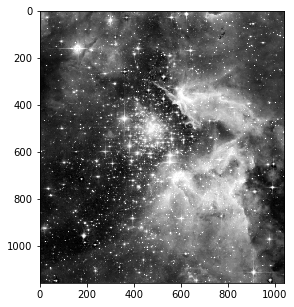

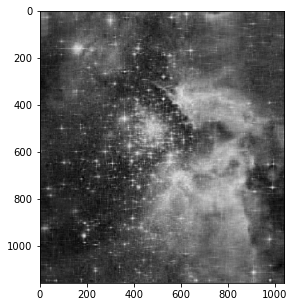

In [24]:
#Problem 5a

from matplotlib import pyplot as plt
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (7, 5)

def svd_approx(A, k):
    
    U,S,Vh = la.svd(A, full_matrices=False)
    S = np.diag(S[:k])
    Ahat = U[:,:k].dot(S).dot(Vh[:k,:])
    
    #diff = A - Ahat
    #norm2 = la.norm(diff)
    #fnorm = cmath.sqrt(np.trace(np.conjugate(diff.T) @ diff))
    return Ahat

def compress_img(filename, k):
    # Take only one layer (layer 0) of the image
    X = plt.imread(filename)[:,:,0].astype(float)
    Xhat = svd_approx(X, k)
    
    return Xhat 

Xhat = compress_img('/Users/bryanchia/Desktop/BootCamp2017/ProbSets/Comp/Wk3_Decomp/hubble.jpg',40)
X = plt.imread('/Users/bryanchia/Desktop/BootCamp2017/ProbSets/Comp/Wk3_Decomp/hubble.jpg')[:,:,0].astype(float)

plt.imshow(X, cmap="gray")
plt.show()
plt.imshow(Xhat, cmap="gray")
plt.show()

Original Image:


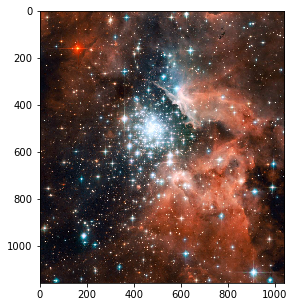

Rank 20 Approximation:


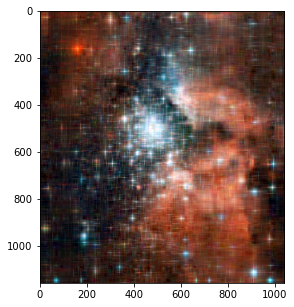

In [43]:
#Problem 5b

import cv2
from scipy import linalg as la

def svd_approx(A, k):
    
    U,S,Vh = la.svd(A, full_matrices=False)
    S = np.diag(S[:k])
    Ahat = U[:,:k].dot(S).dot(Vh[:k,:]) 

    return Ahat

def compress_img_colors(filename, k):
    # Take only one layer (layer 0) of the image
    
    X = plt.imread(filename).astype(float)
    b = X[:,:,0] / 255
    g = X[:,:,1] / 255
    r = X[:,:,2] / 255
    
    bhat = svd_approx(b, k)
    ghat = svd_approx(g, k)
    rhat = svd_approx(r, k)

    for i in range (0, np.shape(bhat)[0]):
        for j in range (0, np.shape(bhat)[1]):
            if bhat[i,j] < 0: bhat[i,j] = 0
            if bhat[i,j] > 1: bhat[i,j] = 1
    
    for i in range (0, np.shape(rhat)[0]):
        for j in range (0, np.shape(rhat)[1]):
            if rhat[i,j] < 0: rhat[i,j] = 0
            if rhat[i,j] > 1: rhat[i,j] = 1
    
    for i in range (0, np.shape(bhat)[0]):
        for j in range (0, np.shape(bhat)[1]):
            if ghat[i,j] < 0: ghat[i,j] = 0
            if ghat[i,j] > 1: ghat[i,j] = 1
    
    Xhat = np.dstack((bhat, ghat, rhat))
    
    return Xhat

X = plt.imread('/Users/bryanchia/Desktop/BootCamp2017/ProbSets/Comp/Wk3_Decomp/hubble.jpg')
Xhat = compress_img_colors('/Users/bryanchia/Desktop/BootCamp2017/ProbSets/Comp/Wk3_Decomp/hubble.jpg',20)

print("Original Image:")
plt.imshow(X)
plt.show()
print("Rank 20 Approximation:")
plt.imshow(Xhat)
plt.show()